In [35]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from textblob import TextBlob

# nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
from wordcloud import WordCloud

# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay



In [36]:
df = pd.read_csv('tweets_file123.csv')
df.head()


,Unnamed: 0,User,text
0,0,andrew97229057,@Cricketracker @dhoni
1,1,devamitrapanda,@ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃💐💐💐
2,2,devamitrapanda,RT @ULHASCHITHARIA: @devamitrapanda @TanayaMod...
3,3,ULHASCHITHARIA,@devamitrapanda @TanayaModak_ @Dhoni Absolutel...
4,4,devamitrapanda,"@ULHASCHITHARIA @TanayaModak_ Was pleasure,esc..."


In [37]:
df.info

<bound method DataFrame.info of     Unnamed: 0             User  \
0            0   andrew97229057   
1            1   devamitrapanda   
2            2   devamitrapanda   
3            3   ULHASCHITHARIA   
4            4   devamitrapanda   
5            5    krishnpandeyy   
6            6    Durga03985780   
7            7        313Amirza   
8            8       1534Gaurav   
9            9         abcmoshs   
10          10          JintoRs   
11          11        m_arulvel   
12          12    goanvartalive   
13          13  Praveen59839036   
14          14  BALAJIS20364676   
15          15   Murugavel_agri   
16          16        shiva7303   
17          17        Saimani07   
18          18        yesveesbi   
19          19  khela_parminder   
20          20  therisingpanjab   
21          21  22875bc8b147415   

                                                 text  
0                               @Cricketracker @dhoni  
1          @ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃

In [38]:
df.isnull().sum()

Unnamed: 0    0
User          0
text          0
dtype: int64

In [39]:
df.columns

Index(['Unnamed: 0', 'User', 'text'], dtype='object')

In [40]:
text_df =df.drop(['Unnamed: 0', 'User'], axis=1)

In [41]:
text_df.head()

,text
0,@Cricketracker @dhoni
1,@ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃💐💐💐
2,RT @ULHASCHITHARIA: @devamitrapanda @TanayaMod...
3,@devamitrapanda @TanayaModak_ @Dhoni Absolutel...
4,"@ULHASCHITHARIA @TanayaModak_ Was pleasure,esc..."


In [42]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

@Cricketracker @dhoni 

@ULHASCHITHARIA @TanayaModak_ @Dhoni 😃😃💐💐💐 

RT @ULHASCHITHARIA: @devamitrapanda @TanayaModak_ @Dhoni Absolutely . You used very appropriate word 👌👌👌 

@devamitrapanda @TanayaModak_ @Dhoni Absolutely . You used very appropriate word 👌👌👌 

@ULHASCHITHARIA @TanayaModak_ Was pleasure,escastic to watch @Dhoni to play 



In [43]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+\www\S+https\s+",'',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)


In [44]:
text_df.text = text_df['text'].apply(data_processing)

In [45]:
text_df =text_df.drop_duplicates('text')

In [46]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [47]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [48]:
text_df.head()

,text
0,cricketracker dhoni
1,ulhaschitharia tanayamodak_ dhoni
2,rt ulhaschitharia devamitrapanda tanayamodak_ ...
3,devamitrapanda tanayamodak_ dhoni absolutely u...
4,ulhaschitharia tanayamodak_ pleasureescastic w...


In [49]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

cricketracker dhoni 

ulhaschitharia tanayamodak_ dhoni 

rt ulhaschitharia devamitrapanda tanayamodak_ dhoni absolutely used appropriate word 

devamitrapanda tanayamodak_ dhoni absolutely used appropriate word 

ulhaschitharia tanayamodak_ pleasureescastic watch dhoni play 



In [50]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22 non-null     object
dtypes: object(1)
memory usage: 352.0+ bytes


In [51]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [52]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [53]:
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"

In [54]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

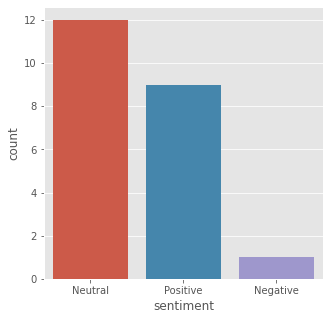

In [55]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

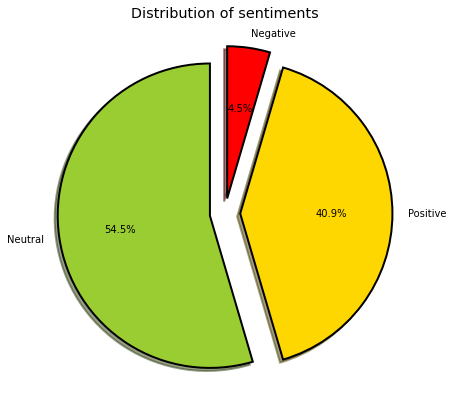

In [56]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor' :"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors =colors,
        startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [57]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment
14,rt velai_illa_vasu dhoni illustration happy bi...,0.800,Positive
18,settling ipl2022 dhoni hands baton jaddu csk c...,0.800,Positive
15,dhoni legendary captaincy tenure yellow skip c...,0.500,Positive
16,imvkohli msdhoni king imvkohli captain cool dh...,0.425,Positive
2,rt ulhaschitharia devamitrapanda tanayamodak_ ...,0.350,Positive


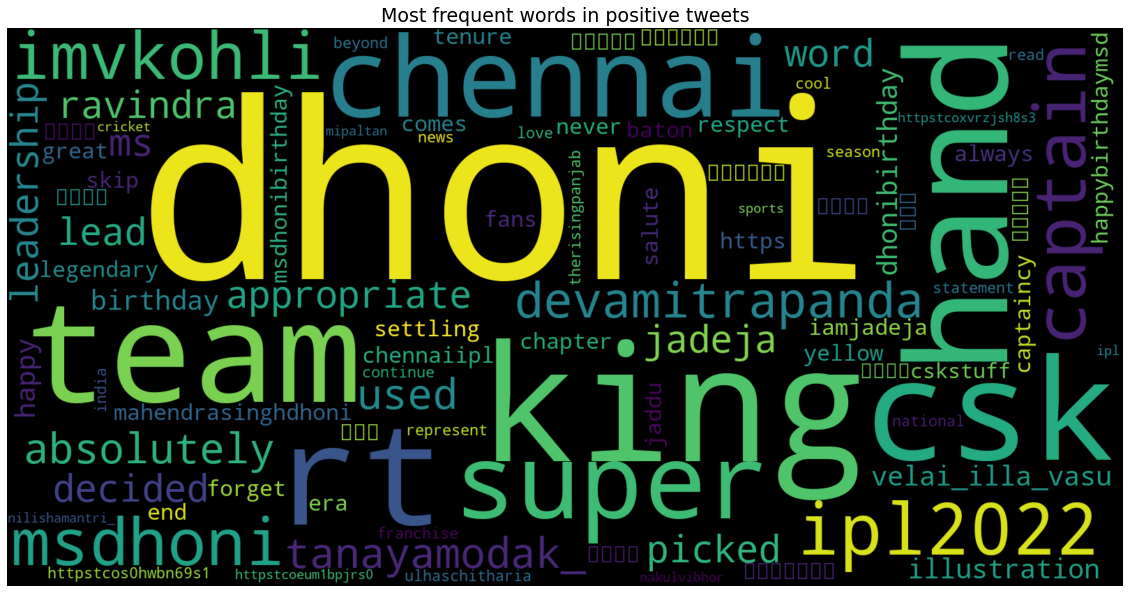

In [58]:
text = ' '.join ([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [62]:
neg_tweets = text_df[text_df.sentiment == 'Nagative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,text,polarity,sentiment


In [ ]:
text = ' '.join ([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)
neutral_tweets.head()

,text,polarity,sentiment
2,rt cultural_pendu modi government continuously...,0.0,Neutral
3,rt indrajeetmaximo मद सरकर क शसनकल म यपए सरकर ...,0.0,Neutral
4,dailymirror_sl white punjabi weared person modi,0.0,Neutral
5,rt sanjaykupadhya pm appreciates enthusiasm pa...,0.0,Neutral
6,bjp4india expecting modi govt httpstco1zt0jypwuh,0.0,Neutral


In [ ]:
nag_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,text,polarity,sentiment
11,rt voice_for_india tell since modi ji first to...,0.461111,Positive
0,rt varunkrrana modi responsible russia ukraine...,0.200000,Positive


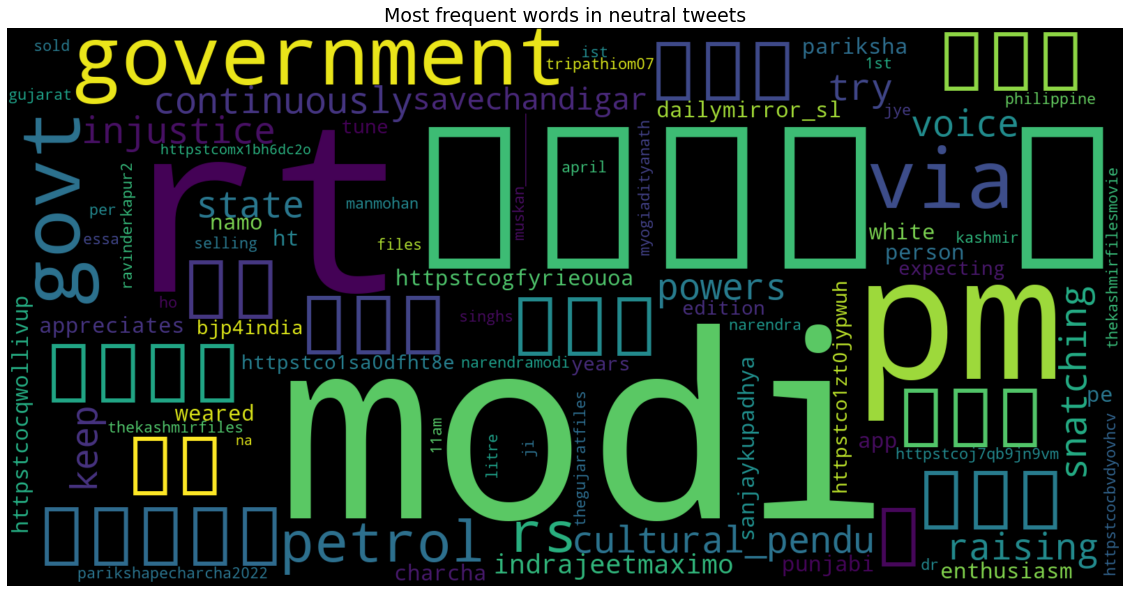

In [ ]:
text = ' '.join ([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height= 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 266

First 20 features:
 ['105', '11am', '11am ist', '130', '130 pm', '1st', '1st april', '2014', '2014 seen', '65', '65 जयद', '70', '70 per', 'amp', 'amp diesel', 'app', 'app httpstco1sa0dfht8e', 'appreciates', 'appreciates enthusiasm', 'april']


/home/shital/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X) 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print("size of x_train:",(x_train.shape))
print("size of y_train:",(y_train.shape))
print("size of x_test:",(x_test.shape))
print("size of x_test:",(y_test.shape))

size of x_train: (10, 266)
size of y_train: (10,)
size of x_test: (3, 266)
size of x_test: (3,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
loreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {: 0.2f}%".format(loreg_acc*100))

Test accuracy:  66.67%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print ('\n')
print(classification_report(y_test, logreg_pred))


[[2 0]
 [1 0]]


              precision    recall  f1-score   support

     Neutral       0.67      1.00      0.80         2
    Positive       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


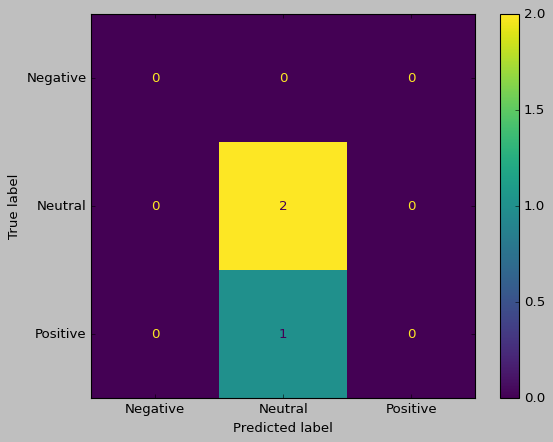

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1,10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

/home/shital/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameteres:", grid.best_params_)

Best parameteres: {'C': 0.001}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:0.2f}%".format(logreg_acc*100))

Test accuracy: 66.67%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2 0]
 [1 0]]


              precision    recall  f1-score   support

     Neutral       0.67      1.00      0.80         2
    Positive       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:0.2f}%".format(svc_acc*100))

test accuracy: 66.67%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[2 0]
 [1 0]]


              precision    recall  f1-score   support

     Neutral       0.67      1.00      0.80         2
    Positive       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
grid = {
    'C':[0.01, 0.1, 1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

/home/shital/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameteres:", grid.best_params_)

Best parameteres: {'C': 0.001}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:0.2f}%".format(logreg_acc*100))

Test accuracy: 66.67%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[2 0]
 [1 0]]


              precision    recall  f1-score   support

     Neutral       0.67      1.00      0.80         2
    Positive       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shital/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
